# Time-series prediction
Dataset: online retail sales from 2010-12 to 2011-12

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your time-series dataset
df = pd.read_csv('../data/online-retail.csv', encoding='unicode_escape')

# Convert to datetime and handle errors
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d %H:%M', errors='coerce')

# Drop rows with invalid dates
df.dropna(subset=['InvoiceDate'], inplace=True)

# Set the date column as the index
df.set_index('InvoiceDate', inplace=True)

/tmp/ipykernel_148259/236789735.py:6: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/online-retail.csv', encoding='unicode_escape')


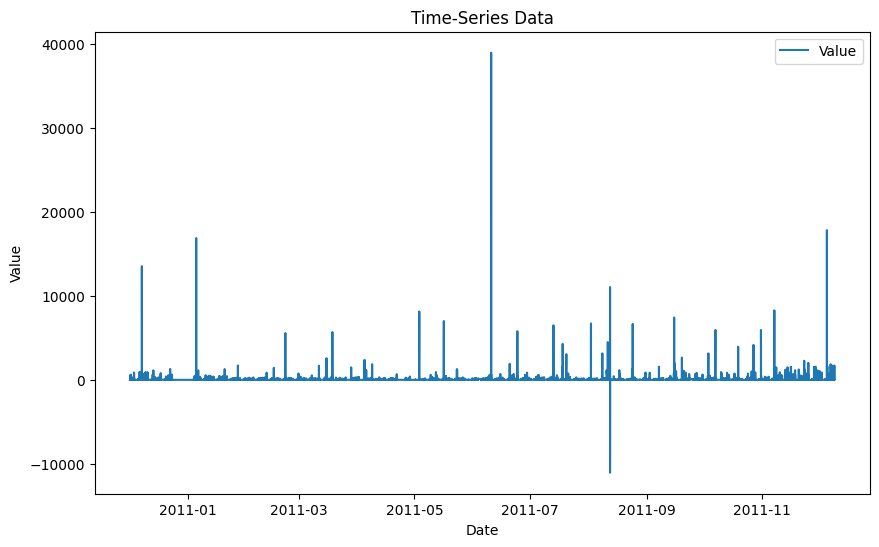

In [4]:
# Plot the time-series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Value')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time-Series Data')
plt.legend()
plt.show()

In [5]:
df[~df.Price.between(-1000,1000)]

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,
2010-12-07 15:04:00,C537630,AMAZONFEE,AMAZON FEE,-1,13541.33,NaN,United Kingdom
2010-12-07 15:08:00,537632,AMAZONFEE,AMAZON FEE,1,13541.33,NaN,United Kingdom
2010-12-07 15:34:00,C537644,AMAZONFEE,AMAZON FEE,-1,13474.79,NaN,United Kingdom
2010-12-07 15:41:00,C537647,AMAZONFEE,AMAZON FEE,-1,5519.25,NaN,United Kingdom
2010-12-07 15:49:00,C537651,AMAZONFEE,AMAZON FEE,-1,13541.33,NaN,United Kingdom
...,...,...,...,...,...,...,...
2011-12-05 17:24:00,580729,DOT,DOTCOM POSTAGE,1,1172.10,NaN,United Kingdom
2011-12-07 10:35:00,581023,DOT,DOTCOM POSTAGE,1,1861.46,NaN,United Kingdom
2011-12-08 09:28:00,581219,DOT,DOTCOM POSTAGE,1,1008.96,NaN,United Kingdom


In [6]:
# Remove rows with only alphabets and whitespaces 
df = df[~df['StockCode'].str.contains(r'^[A-Za-z\s]+$', na=False)]

In [7]:
df[~df.Price.between(-1000,1000)]

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,


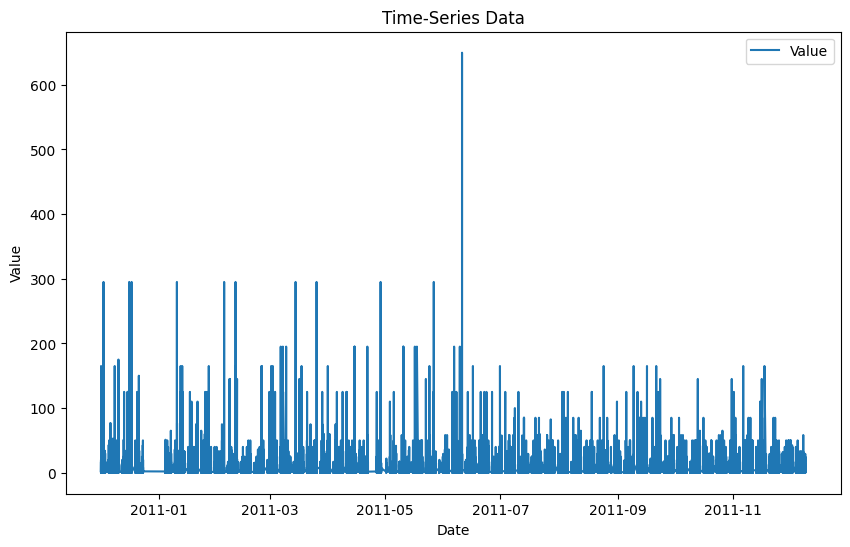

In [8]:
# Plot the time-series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Value')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time-Series Data')
plt.legend()
plt.show()

In [9]:
df[df['Price'] > 500]

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,
2011-06-10 15:28:00,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,649.5,15098.0,United Kingdom
2011-06-10 15:33:00,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,649.5,15098.0,United Kingdom


In [23]:
# Print date range
index_min = df.index.min()
index_max = df.index.max()
print(f"Date range: {index_min} to {index_max}")

Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [11]:
# Identify columns with NaN values
columns_with_nan = df.columns[df.isna().any()].tolist()
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['Description', 'Customer ID']


In [21]:
df['Quantity'] = df['Quantity'].astype(int)
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
Price          float64
Customer ID     object
Country         object
dtype: object

/tmp/ipykernel_148259/1433118250.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df[['Quantity', 'Price']].resample('M').sum()


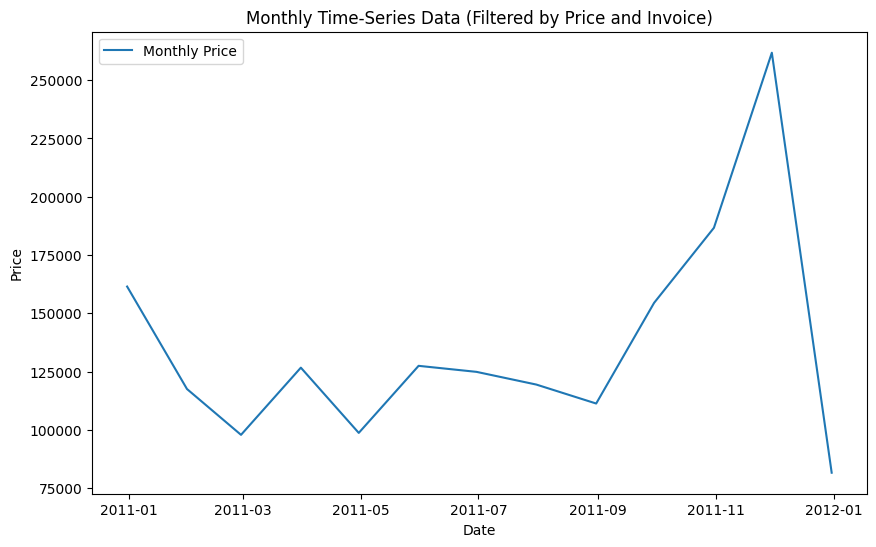

In [26]:
# Roll up by months
df_monthly = df[['Quantity', 'Price']].resample('M').sum()

# Plot the time-series data rolled up by months
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['Price'], label='Monthly Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monthly Time-Series Data (Filtered by Price and Invoice)')
plt.legend()
plt.show()

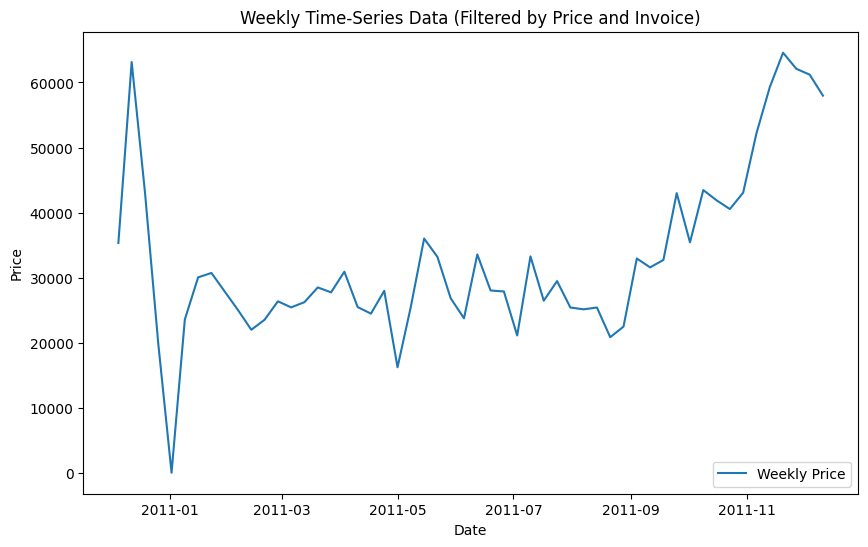

In [ ]:
# Roll up by weeks
df_weekly = df[['Quantity', 'Price']].resample('W').sum()

# Plot the time-series data rolled up by weeks
plt.figure(figsize=(10, 6))
plt.plot(df_weekly.index, df_weekly['Price'], label='Weekly Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Time-Series Data (Filtered by Price and Invoice)')
plt.legend()
plt.show()